In [1]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_10/'

In [2]:
d = np.load(f'{source_path}/string_iso.npz')
t_ar=d['t_ar']
all_strings=d['all_strings']
all_isos=d['all_isos']

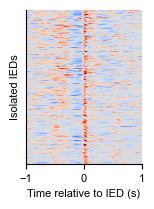

In [3]:
fig,ax = plt.subplots(figsize=(1.5,2))
ax.pcolormesh(t_ar,range(len(all_isos)),np.array(all_isos),cmap='coolwarm',vmin=-150,vmax=150)
ax.set(yticks=[],ylabel='Isolated IEDs',xlabel='Time relative to IED (s)')
np.savetxt(f'./statistical_source/ED10/iso_ieds.txt', np.array(all_isos))

#plt.savefig('../Supp/iso_ieds.jpg',dpi=300,bbox_inches='tight')

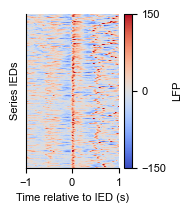

In [4]:
fig,ax = plt.subplots(figsize=(1.5,2))
im = ax.pcolormesh(t_ar,range(len(all_strings)),np.array(all_strings),cmap='coolwarm',vmin=-150,vmax=150)
plt.colorbar(im,label='LFP',ticks=[-150,0,150])
ax.set(yticks=[],ylabel='Series IEDs',xlabel='Time relative to IED (s)')
np.savetxt(f'./statistical_source/ED10/series_ieds.txt', np.array(all_strings))

#plt.savefig('../Supp/series_ieds.jpg',dpi=300,bbox_inches='tight')

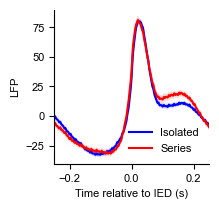

In [5]:
from scipy.stats import sem
t_ar = np.linspace(-1,1,all_strings.shape[-1])
fig,ax = plt.subplots(figsize=(2,2))
ax.plot(t_ar,all_isos.mean(0),color='b',label='Isolated')
ax.plot(t_ar,all_strings.mean(0),color='r',label='Series')

ax.fill_between(t_ar,all_strings.mean(0)+sem(all_strings,axis=0),
        all_strings.mean(0)-sem(all_strings,axis=0),color='r',alpha=0.1,label='_Series')

ax.fill_between(t_ar,all_isos.mean(0)+sem(all_isos,axis=0),
        all_isos.mean(0)-sem(all_isos,axis=0),color='b',alpha=0.1,label='_Series')
ax.set(xlim=[-0.25,0.25],xlabel='Time relative to IED (s)',ylabel='LFP')
ax.legend(frameon=False)
#plt.savefig('../Supp/series_iso_discharge.jpg',dpi=300,bbox_inches='tight')